In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as s

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def data_loading(train_batches, test_batches):
    # Fetch training data: total 60000 samples
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batches = train_batches, shuffle=True)

    # Fetch test data: total 10000 samples
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batches = test_batches, shuffle=True)

    return (train_loader, test_loader)

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [5]:
def define_opt(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [6]:
def train(model, opt, train_loader):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        opt.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        opt.step()


In [7]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [8]:
def compute(model, opt):
    loss_train_arr = []
    loss_test_arr = []
    test_acc_arr = []
    train_acc_arr = []
    for epoch in range(1, epochs + 1):
        train(model, opt, train_loader)
        tr_loss, tr_acc = calculate_loss(model, train_loader, loss_fn)
        t_loss, t_acc = calculate_loss(model, test_loader, loss_fn)
        print("Model Train loss: ", tr_loss)
        loss_train_arr.append(tr_loss)
        loss_test_arr.append(t_loss)
        train_acc_arr.append(tr_acc)
        test_acc_arr.append(t_acc)
    return loss_train_arr, loss_test_arr, train_acc_arr, test_acc_arr

In [9]:
epochs = 30

In [10]:
torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = data_loading(500, 500)
model2 = CNN()
opt = define_opt(model2)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(model2, opt)

batch_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = data_loading(100, 100)
model1 = CNN()
opt = define_opt(model1)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(model1, opt)

batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())

Model Train loss:  tensor(1.4431)
Model Train loss:  tensor(0.2387)
Model Train loss:  tensor(0.1546)
Model Train loss:  tensor(0.1118)
Model Train loss:  tensor(0.0944)
Model Train loss:  tensor(0.0790)
Model Train loss:  tensor(0.0735)
Model Train loss:  tensor(0.0616)
Model Train loss:  tensor(0.0561)
Model Train loss:  tensor(0.0515)
Model Train loss:  tensor(0.0500)
Model Train loss:  tensor(0.0414)
Model Train loss:  tensor(0.0411)
Model Train loss:  tensor(0.0452)
Model Train loss:  tensor(0.0379)
Model Train loss:  tensor(0.0359)
Model Train loss:  tensor(0.0307)
Model Train loss:  tensor(0.0293)
Model Train loss:  tensor(0.0298)
Model Train loss:  tensor(0.0261)
Model Train loss:  tensor(0.0262)
Model Train loss:  tensor(0.0277)
Model Train loss:  tensor(0.0217)
Model Train loss:  tensor(0.0217)
Model Train loss:  tensor(0.0206)
Model Train loss:  tensor(0.0182)
Model Train loss:  tensor(0.0187)
Model Train loss:  tensor(0.0175)
Model Train loss:  tensor(0.0166)
Model Train lo

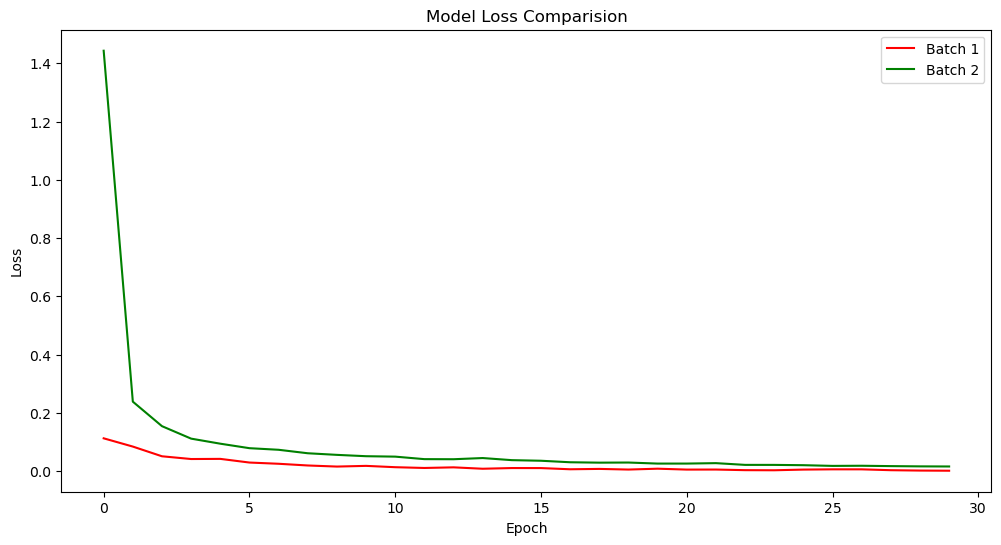

In [11]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

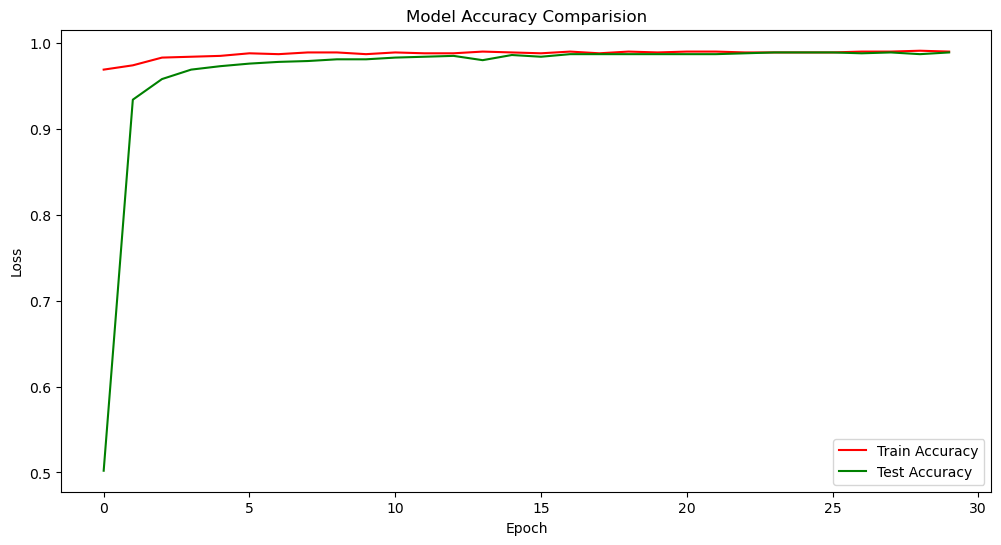

In [12]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [14]:
alpha_train_arr_of_losses = []
alpha_test_arr_of_losses = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [15]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    fun_loss_val = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_arr_of_losses.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_arr_of_losses.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

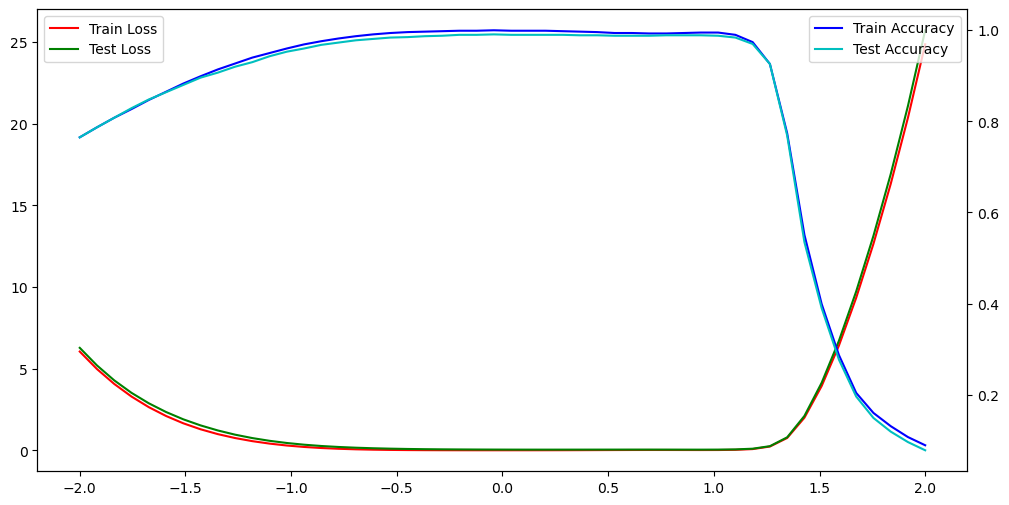

In [16]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_arr_of_losses, color = "r")
plt.plot(alpha, alpha_test_arr_of_losses, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "c")
plt.legend(['Train Accuracy' , 'Test Accuracy'])

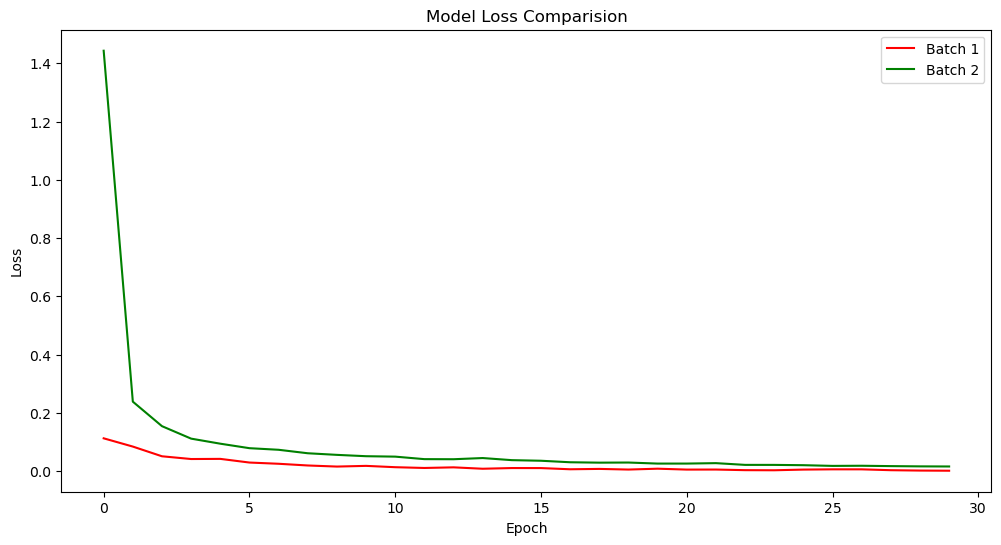

In [17]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

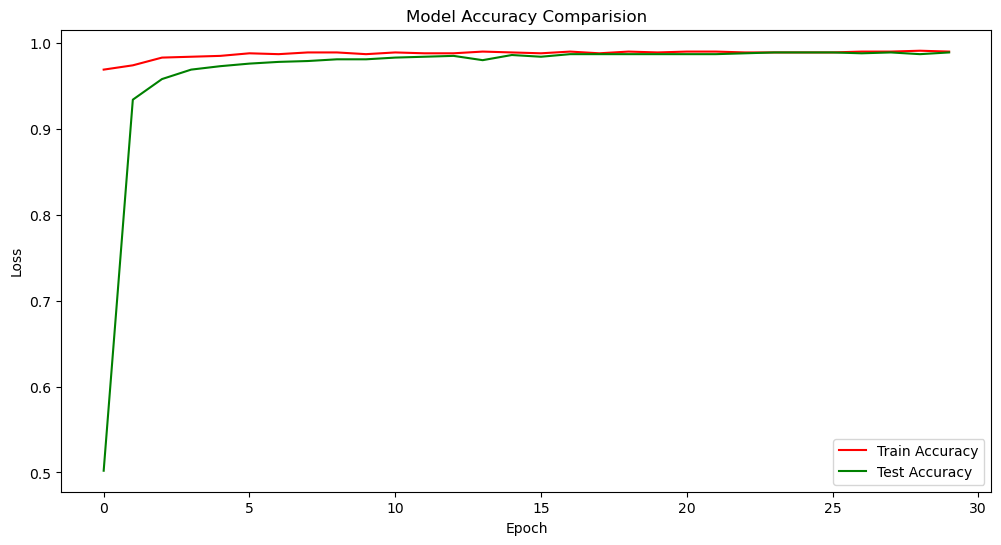

In [18]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [20]:
alpha_train_arr_of_losses = []
alpha_test_arr_of_losses = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []


In [21]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    fun_loss_val = nn.CrossEntropyLoss()
    #opt = torch.optim.Adam(model.parameters(), lr=0.0004, weight_decay = 1e-4)

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_arr_of_losses.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_arr_of_losses.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

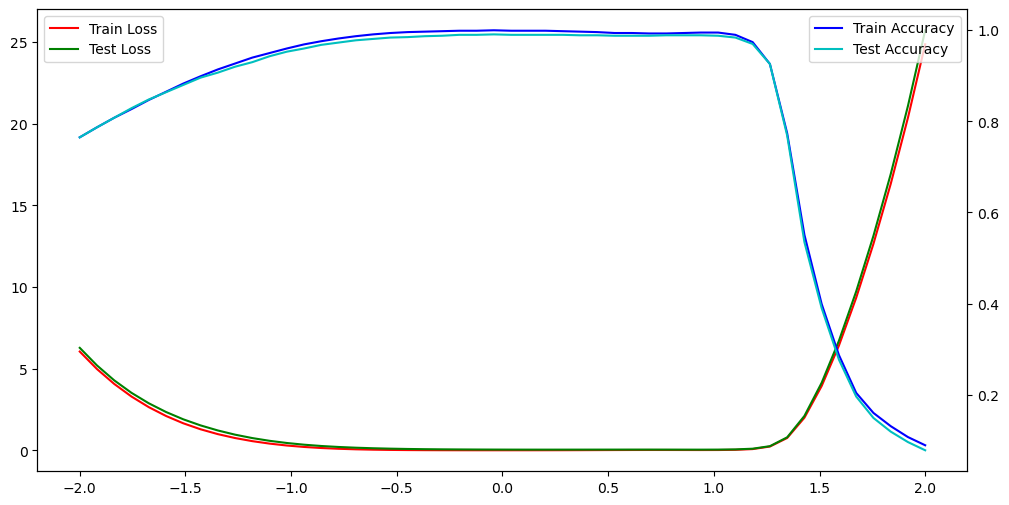

In [22]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_arr_of_losses, color = "r")
plt.plot(alpha, alpha_test_arr_of_losses, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "c")
plt.legend(['Train Accuracy' , 'Test Accuracy'])